In [17]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)



In [18]:
kat3 = finesse.kat()
kat3.verbose=True
kat3.parse("""


l laser 1 0 nin                  
mod EOM 55.55M 0.001 1 pm nin n0 
maxtem 3                         
s s0 0 n0 n1
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3 
s s1 0.1 n2 n4                        
m ITM 0.98997 0.01 0 n4 n5               
s scavity 3.3 n5 n6                   
m ETM 0.99996 0.00001 0 n6 n7               

s s2 0.1 n3 n8                       
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump 
s sQPD1 0.1 n9 n11                   
s sQPD2 0.1 n10 n12                  

cav cavity ITM n5 ETM n6 
trace 2                  
attr ETM Rc 11.3         
attr ETM xbeta 0         
attr ITM xbeta 0         
pd1 PDrefl 55.55M 0 n8*   

attr sQPD1 g 20   
attr sQPD2 g 110 

pd1 QPDrefl1 55.55M 0 n11
pd1 QPDrefl1_Q 55.55M 90 n11 
pdtype QPDrefl1 x-split
pdtype QPDrefl1_Q x-split   

pd1 QPDrefl2 55.55M 0 n12 
pd1 QPDrefl2_Q 55.55M 90 n12 
pdtype QPDrefl2 x-split
pdtype QPDrefl2_Q x-split   

set err PDrefl re    
lock z $err 3000 10n 
put ETM phi $z       
noplot z             
xaxis ITM xbeta lin 0 0.5m 500 
#xaxis ETM xbeta lin 0 0.5m 500  

#yaxis re:im
""")

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2022-08-24 23:43:22.860633


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 16.9366 seconds

--- Output info ---

Run date and time: 2022-08-24 23:43:22.860633
Detectors used: PDrefl, QPDrefl1, QPDrefl1_Q, QPDrefl2, QPDrefl2_Q, z

One xaxis used: ['xaxis ITM xbeta lin 0 0.0005 500']
PDrefl     : min = -9.971666136539030e-09 max = 9.999802451456800e-09
QPDrefl1   : min = -1.049041256549410e-07 max = 4.561538465925170e-06
QPDrefl1_Q : min = -2.246865375197990e-06 max = 6.397297117124200e-08
QPDrefl2   : min = -1.111795504050590e-07 max = 1.673725309223250e-05
QPDrefl2_Q : min = -8.087269028519901e-06 max = 3.780035657028430e-08
z          : min = 0.000000000000000e+00 max = 7.742675772282639e+01


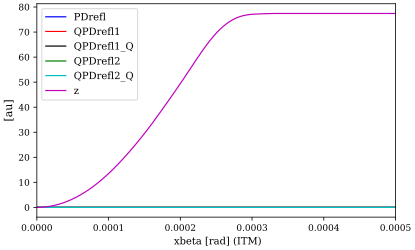

In [19]:
out2 = kat3.run()
out2.info()
out2.plot()

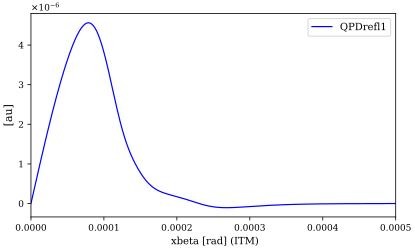

In [20]:
out2.plot(['QPDrefl1'])

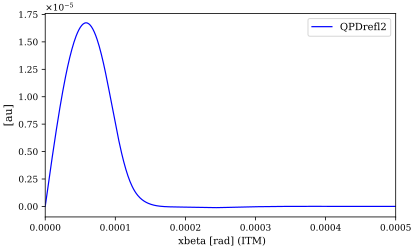

In [21]:
out2.plot(['QPDrefl2'])

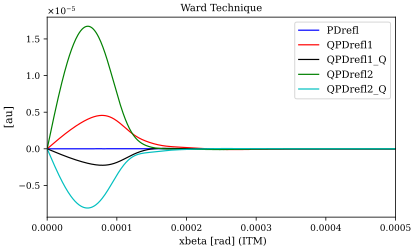

In [22]:
out2.plot(['QPDrefl1','QPDrefl2','PDrefl','QPDrefl2_Q','QPDrefl1_Q'],title='Ward Technique')

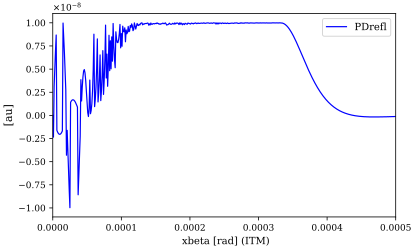

In [23]:
out2.plot(['PDrefl'])

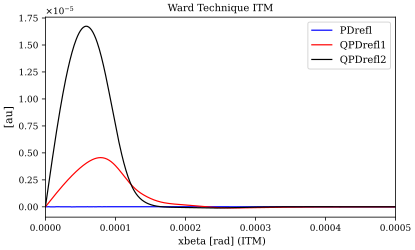

In [24]:
out2.plot(['QPDrefl1','QPDrefl2','PDrefl'],title='Ward Technique ITM')